<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculation-+-interactive-figure" data-toc-modified-id="Calculation-+-interactive-figure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculation + interactive figure</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Static-Fig.-3" data-toc-modified-id="Static-Fig.-3-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Static Fig. 3</a></span></li></ul></li><li><span><a href="#Table-1-(number-of-detected-events-per-month)" data-toc-modified-id="Table-1-(number-of-detected-events-per-month)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Table 1 (number of detected events per month)</a></span></li><li><span><a href="#Number-of-events-per-year" data-toc-modified-id="Number-of-events-per-year-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Number of events per year</a></span></li></ul></div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import glob
from averaging import xarray_average
import xarray.ufuncs as xrf
import detect_peaks as dp
import pandas as pd
import matplotlib as mpl

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
minorLocator = MultipleLocator(2.5)
minorLocator2 = AutoMinorLocator(2)

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CrosshairTool, Span

In [2]:
%reload_ext watermark
%watermark --iversions -v -m

matplotlib   3.1.2
pandas       1.0.1
xarray       0.14.1
detect_peaks 1.0.4
numpy        1.17.3
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
inpath = '/mnt/4data/CMAM/0A.daily/'
cesta = f'{inpath}accelogw/accelogw_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*18.nc'
infiles = sorted(glob.glob(cesta))
len(infiles)

32

In [3]:
ds = xr.open_mfdataset(infiles, concat_dim='time', combine = 'by_coords', parallel = True)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 48, lon: 96, plev: 63, time: 46720)
Coordinates:
  * lat        (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 8e+04 ... 0.2 0.15 0.1 0.07
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * time       (time) object 1979-01-01 00:00:00 ... 2010-12-31 18:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1460, 2), meta=np.ndarray>
    plev_bnds  (time, plev, bnds) float64 dask.array<chunksize=(1460, 63, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1460, 48, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1460, 96, 2), meta=np.ndarray>
    accelogw   (time, plev, lat, lon) float32 dask.array<chunksize=(1460, 63, 48, 96), meta=np.ndarray>
Attributes:
    institution:            CCCma (Canadian Centre for Climate Modelling and ...
    institute_id:           CCCma
    experiment_id:          CMAM30-SD
    source:                 CMAM 2013
    model_id:               CMAM
    forcing:                N/A
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                cccma_info@ec.gc.ca
    comment:                The CMAM30 team gratefully acknowledges the Canad...
    references:             http://www.cccma.ec.gc.ca/models
    initialization_method:  1
    physics_version:        1
    tracking_id:            a68fc644-208b-4e36-8ee0-0f0d0289b1de
    CCCma_runid:            cmam20_abc001
    CCCma_data_licence:     1) GRANT OF LICENCE - The Government of Canada (E...
    product:                output
    experiment:             CMAM 30-year specified dynamics run
    frequency:              6hr
    creation_date:          2013-05-27T23:44:06Z
    history:                2013-05-27T23:44:06Z CMOR rewrote data to comply ...
    Conventions:            CF-1.4
    project_id:             CMAM30
    table_id:               Table 6hrPlev (10 April 2013) 303ca12ce2a31d5584f...
    title:                  CMAM model output prepared for CMAM30 CMAM 30-yea...
    parent_experiment:      N/A
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.2

# Calculation + interactive figure

In [6]:
sel_dict_ea = dict(lon =slice(110,145), lat=slice(30,48), plev = 7000) #EAst Asia; box2 = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
sel_dict_hi = dict(lon =slice(70,102.5), lat=slice(20,40), plev = 7000) #Himalayas; box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
sel_dict_wa = dict(lon =slice(-125+360,-102.5+360), lat=slice(27.5,52), plev = 7000) #Western America; box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
sel_dict_areas = [sel_dict_hi, sel_dict_wa, sel_dict_ea]#, sel_dict_mo]
names = ['himalayas', 'westamer', 'eastasia']#, 'mongolian']
weights = xrf.cos(xrf.deg2rad(ds.lat))

In [203]:
def truncate_index(indexes, n, greater = True, space_in_days = 10):
    if greater:
        res = indexes+space_in_days
        diff = res - n
        mask = diff > 0
        if np.any(mask):
            res[mask] -= diff[mask]+1
            #print('greater')        
            return res
        else:
            return res
    else:
        res = indexes-space_in_days
        mask = res < 0
        if np.any(mask):
            res[mask] = 0
            return res
        else:
            return res
        
def bokeh_fig(df, indexes_20, indexes_30, name, title, threshold, color):
    output_file(f"accelogw_{name}_hotspot@70hPa.html")

    # create a new plot with a datetime axis type
    hover = HoverTool(tooltips=[
        ("Time", "@x"),
        ("oGWD", "@y")
    ])
    p = figure(plot_width=1200, plot_height=450, x_axis_type="datetime", \
               title=f'{title}', y_axis_label='OGWD [m/s/day]')
    p.title.align = 'center'
    p.title.text_font_style = "bold"
    
    
    p.add_tools(CrosshairTool())
    p.add_tools(HoverTool(tooltips = [("time", "@time{%F}"),\
                                      ("OGWD", "@oGWD"),], \
                          formatters={'time': 'datetime'}, \
                          names=['lineplot']))

    p.line(x='time', y='oGWD', source=ColumnDataSource(df.reset_index()),color='navy',name='lineplot')

    n20 = len(indexes_20)
    n30 = len(indexes_30)
    df_max = df.oGWD.max()
    df_min = df.oGWD.min()
    
    right_indexes = truncate_index(indexes_20, df.shape[0])
    left_indexes = truncate_index(indexes_20, df.shape[0], greater=False)
    p.quad(top=[df_max]*n20, bottom=[df_min]*n20, left=df.index[left_indexes], \
           right=df.index[right_indexes], color="red", alpha = 0.3, legend = '20-day time scale')
    
    left_indexes = truncate_index(indexes_30, df.shape[0], greater=False, space_in_days=15)
    right_indexes = truncate_index(indexes_30, df.shape[0], space_in_days=15)
    p.quad(top=[df_max]*n30, bottom=[df_min]*n30, left=df.index[left_indexes], \
           right=df.index[right_indexes], color="purple", alpha = 0.3, legend = '30-day time scale')
    
    
    threshold_line = Span(location=threshold,
                              dimension='width', line_color=color,
                              line_dash='dashed', line_width=2)
    p.add_layout(threshold_line)
    
    p.legend.location = "bottom_right"
    p.legend.click_policy="hide"
    
    show(p)

    #return p


In [205]:
thres_ls = []
titles = ['Himalayas', 'West America', 'East Asia']
colors = ["amber", "green", "purple"] 
pal = sns.xkcd_palette(colors)

for i, (name, sel_dict, title) in enumerate(zip(names, sel_dict_areas, titles)):
    print(name)
    
    ds_sel_ea = ds['accelogw'].sel(**sel_dict)
    ds_sel_ea_anom = ds_sel_ea * 3600 * 24 # convert to [m/s/day]
    
    #spatial averaging
    ds_sel_ea_anom_ts = xarray_average(ds_sel_ea_anom, \
                                       dim = ['lat', 'lon'], \
                                       weights = weights).load()
    # daily resampling
    ds_sel_ea_anom_ts = ds_sel_ea_anom_ts.resample(time='1D').mean()
    ds_sel_ea_anom_ts.name = 'oGWD'
    
    df = ds_sel_ea_anom_ts.to_dataframe().dropna()
    df.index = df.index.to_datetimeindex()
    df.index.name = 'time'
    
    # peak detection
    thres = 0.55
    thres = thres * (np.max(ds_sel_ea_anom_ts*-1) - np.min(ds_sel_ea_anom_ts*-1)) + np.min(ds_sel_ea_anom_ts*-1)
    thres_ls.append(thres.values)
    print(thres.values*-1)
    print((0.55*(np.min(ds_sel_ea_anom_ts)-np.max(ds_sel_ea_anom_ts))+np.max(ds_sel_ea_anom_ts)).values)
        
    indexes_20 = dp.detect_peaks(df['oGWD'].values, mpd=20, mph=thres.values, valley=True)
    indexes_30 = dp.detect_peaks(df['oGWD'].values, mpd=30, mph=thres.values, valley=True)
    
    # interactive figure
    bokeh_fig(df, indexes_20, indexes_30, name, title, float(thres.values)*-1, pal.as_hex()[i])
    
    #outputs
    #df.to_csv("accelogw_{}_hotspot@70hPa_ts.csv".format(name))
    
    df20 = df.iloc[indexes_20]['oGWD'].reset_index()
    df20 = df20.rename(columns={'time': 'BeginDate'})
    #df20.to_csv("accelogw_{}_hotspot@70hPa_20dayts_indexes.csv".format(name))
    
    df30 = df.iloc[indexes_30]['oGWD'].reset_index()
    df30 = df30.rename(columns={'time': 'BeginDate'})
    #df30.to_csv("accelogw_{}_hotspot@70hPa_30dayts_indexes.csv".format(name))

himalayas


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


-6.657176004503176
-6.657176004503176


westamer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


-7.130264163109152
-7.130264163109152


eastasia


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


-5.07077488220312
-5.07077488220312


# Visualization

## Static Fig. 3

0
1
2


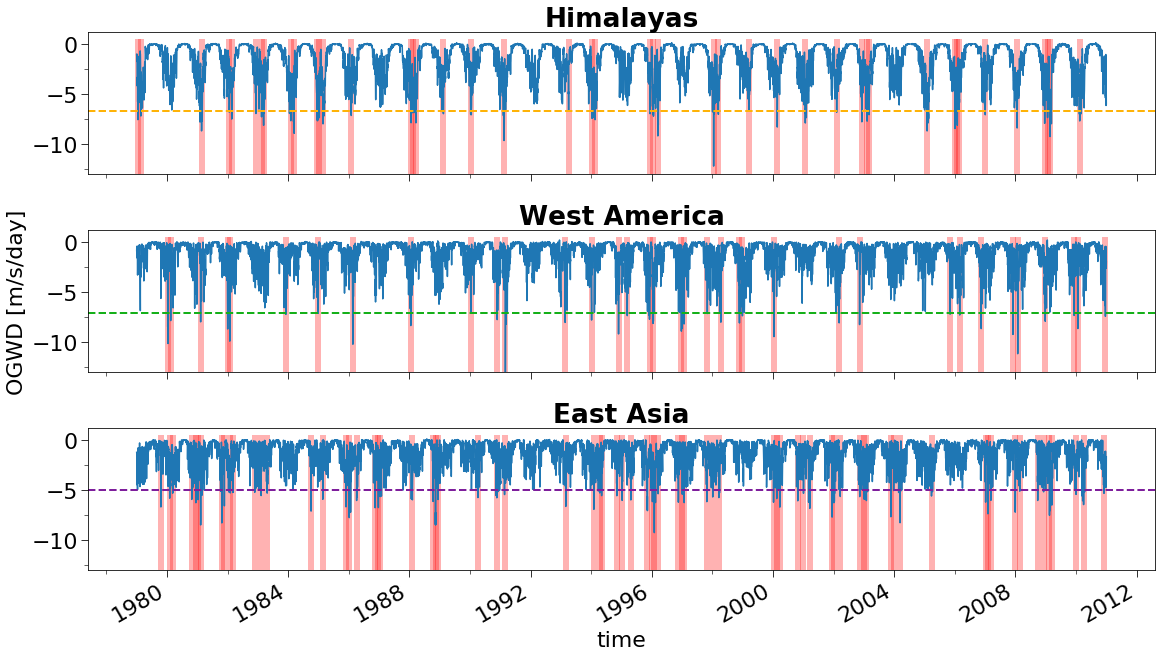

In [84]:
mpl.rcParams.update({'font.size': 22})


fig, axes = plt.subplots(nrows=3, sharex=True, figsize = (16,9))
for i, (name, sel_dict, ax) in enumerate(zip(names[:], sel_dict_areas, axes)):
    print(i)
    df = pd.read_csv("accelogw_{}_hotspot@70hPa_ts.csv".format(name), parse_dates=True)
    df['time'] = df.time.apply(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
    df.set_index('time').oGWD.plot(ax = ax)
    
    df20 = pd.read_csv(f"accelogw_{name}_hotspot@70hPa_20dayts_indexes.csv")
    df30 = pd.read_csv(f"accelogw_{name}_hotspot@70hPa_30dayts_indexes.csv") 
    df20['BeginDate'] = df20.BeginDate.apply(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
    ax.vlines(df20.BeginDate.values,0.5,-13, lw = 6, alpha = 0.3, color = 'red')
    ax.axhline(thres_ls[i]*-1, linestyle='dashed', color=pal[i], lw = 2)
    
    ax.set_title(titles[i], fontdict = dict(fontweight = 'bold'))
    ax.set_ylim(-13,None)
    ax.set_yticks([0,-5,-10])
    ax.yaxis.set_minor_locator(minorLocator)
    ax.xaxis.set_minor_locator(minorLocator2)
    

    if i == 1:
        ax.set_ylabel('OGWD [m/s/day]')
        
    ax.xaxis.axes.tick_params(which='major', length=7)
    ax.xaxis.axes.tick_params(which='minor', length=4)
    ax.yaxis.axes.tick_params(which='major', length=7)
    ax.yaxis.axes.tick_params(which='minor', length=4)

fig.tight_layout(pad=0.1)


plt.savefig('static_ts_plot_ogwd_hotspots@70hPa.pdf', bbox_inches='tight')

# Table 1 (number of detected events per month)

In [4]:
def open_date_file(file_path):
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    df['BeginDate'] = df.BeginDate.apply(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
    return df

In [17]:
ch_lev = 70
timescale = 20

all_ls = []
for name in names:
    df_dates_orig = open_date_file(f'accelogw_{name}_hotspot@{ch_lev}hPa_{timescale}dayts_indexes.csv')
    df_dates = df_dates_orig.set_index('BeginDate')
    df_temp = df_dates.groupby(by=[df_dates.index.month_name()]).count()#.reset_index()
    df_temp.index.names = ['Month']
    djf_mask = (df_temp.index == 'December') | (df_temp.index == 'January') | (df_temp.index == 'February')
    df_temp = df_temp[djf_mask]
    df_temp = df_temp.rename(columns={'oGWD': f'{name}'})
    #df_temp = df_temp.reindex(index=np.roll(df_temp.index,1))
    all_ls.append(df_temp)
    
df_table = pd.concat(all_ls, axis = 1)
df_table  = df_table.reindex(index=np.roll(df_table.index,4))
df_table

,himalayas,westamer,eastasia
Month,,,
January,16,11,15
December,5,9,9
February,16,5,13


In [18]:
df_table.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  himalayas &  westamer &  eastasia \\\\\nMonth    &            &           &           \\\\\n\\midrule\nJanuary  &         16 &        11 &        15 \\\\\nDecember &          5 &         9 &         9 \\\\\nFebruary &         16 &         5 &        13 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Number of events per year

In [146]:
all_ls = []
for name in names:
    df_dates_orig = open_date_file(f'accelogw_{name}_hotspot@{ch_lev}hPa_{timescale}dayts_indexes.csv')
    df_dates = df_dates_orig.set_index('BeginDate')
    df_temp = df_dates.groupby(by=[df_dates.index.year]).count()#.reset_index()
    df_temp.index.names = ['Month']
    df_temp = df_temp.rename(columns={'oGWD': f'{name}'})
    #df_temp = df_temp.reindex(index=np.roll(df_temp.index,1))
    all_ls.append(df_temp)
    
df_table = pd.concat(all_ls, axis = 1)
#df_table  = df_table.reindex(index=np.roll(df_table.index,4))
df_table

,himalayas,westamer,eastasia
Month,,,
1979,2.0,NaN,1.0
1980,NaN,2.0,4.0
1981,1.0,1.0,4.0
1982,3.0,2.0,3.0
1983,2.0,1.0,2.0
1984,3.0,1.0,1.0
1985,2.0,NaN,2.0
1986,1.0,1.0,4.0
1987,NaN,NaN,1.0
